#### Chapter 3: Integer Factorization and RSA

In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

#### 3.3

(a) $\phi(6)=2$ do $gcd(1,6)=gcd(5,6)=1$

$\phi(9)=6$ do $gcd(1,9)=gcd(2,9)=gcd(4,9)=gcd(5,9)=gcd(7,9)=gcd(8,9)=1$

$\phi(15)=8$ do $gcd(1,15)=gcd(2,15)=gcd(4,15)=gcd(7,15)=gcd(8,15)=gcd(11,15)=gcd(13,15)=gcd(14,15)=1$

$\phi(17)=16$ do $17$ là số nguyên tố nên mọi số trong khoảng $[1,16]$ đều nguyên tố cùng nhau với $17$

(b) Nếu $p$ là số nguyên tố $\rightarrow$ tất cả các số trong khoảng $[1,p-1]$ đều nguyên tố cùng nhau với $p\rightarrow \phi(p)=p-1$

(c) Gọi $L=\{ i \in \mathbb{Z_n}$ $:$ $gcd(i,n)=1 \} \rightarrow |L|=\phi(n)$

Ta lấy từng phần tử trong tập $L$ và nhân cho một con số $a$ bất kì thuộc $\mathbb{Z}_n$ thoả $gcd(a,n)=1$ thì $L'=\{ ia$ $:$ $gcd(i,n)=1 \}$
- Do $gcd(a,n)=1$ và $gcd(i,n)=1$ nên $gcd(ai,n)=1$ $\rightarrow ai \in L$ $\rightarrow L'$ là 1 hoán vị của $L \rightarrow |L'|=\phi(n)$

Lấy mọi phần tử trong $L'$ nhân với nhau ta có $\prod_{i=1\&gcd(i,n)=1}^{n}(i*a)=\prod_{i=1\&gcd(i,n)=1}^{n}(i)$ $(mod$ $n)$ $\Rightarrow a^{\phi(n)}=1$ $(mod$ $n)$ 

#### 3.5

(a) Tính $d$ thoả $d=e^{-1}$ $(mod$ $\phi(n))$ (có thể tính được do $gcd(e, \phi(n)) = 1$) $\rightarrow ed=1$ $(mod$ $n)$

$x^e=c$ $(mod$ $n)$ $\rightarrow x^{ed}=c^d$ $(mod$ $n)$

Do $gcd(n,c)=1$ $\rightarrow gcd(n,x)=1$ $\rightarrow x^{\phi(n)}=1$ $(mod$ $n)$ $\rightarrow x^{ed\text{ }\%\text{ }\phi(n)}=x=c^d$ $(mod$ $n)$

In [2]:
def solve35(e, c, n):
    factor = []
    pi = 2
    tmp = n
    while tmp != 1:
        while tmp % pi == 0:
            if pi not in factor: factor.append(pi)
            tmp //= pi
        pi += 1
    
    phi_n = n
    for x in factor:
        phi_n = phi_n // x * (x - 1)
    
    d = pow(e, -1, phi_n)
    return pow(c, d, n)

print("(i). x =", solve35(577, 60, 1463))
print("(ii). x =", solve35(959, 1583, 1625))
print("(iii). x =", solve35(133957, 224689, 2134440))

(i). x = 1390
(ii). x = 147
(iii). x = 1892929


#### 3.8

In [3]:
def solve_factor(a, b):
    sum_prime = a - b + 1 # p + q = pq + 1 - (p - 1)(q - 1) = a + 1 - b
    delta = sum_prime * sum_prime - 4 * a
    p = (sum_prime + int(math.sqrt(delta))) // 2
    q = (sum_prime - int(math.sqrt(delta))) // 2
    return p, q

print("(a).", solve_factor(352717, 351520))
print("(b).", solve_factor(77083921, 77066212))
print("(c).", solve_factor(109404161, 109380612))
print("(d).", solve_factor(172205490419, 172204660344))

(a). (677, 521)
(b). (10007, 7703)
(c). (17183, 6367)
(d). (422183, 407893)


#### 3.12

Do $gcd(e_1,e_2)=gcd(1021763679,519424709)=1 \rightarrow$ có thể tìm lại được tin nhắn $m$

Xét phương trình $e_1*u+e_2*v=gcd(e_1,e_2) \rightarrow 1021763679*u+519424709*v=1$

Sử dụng định lý **Bezout** ta giải ra được $u=252426389$ và $v=-496549570$

Vậy xét đẳng thức $c_1^u*c_2^v=m^{e_1*u+e_2*v}=m$ $(mod$ $n)$ $\Rightarrow m=1244183534^{252426389}*(732959706^{496549570})^{-1}$ $(mod$ $1889570071)=1054592380$

#### 3.14

In [4]:
def miller_rabin_test(a, n):
    if n % 2 == 0 or math.gcd(a, n) > 1: return 0

    q = n - 1
    k = 0
    while q % 2 == 0:
        k += 1
        q //= 2
    
    a = pow(a, q, n)
    if a == 1: return 1
    for i in range(k):
        if a == n - 1: return 1
        a = (a * a) % n
    return 0

n = 1105
ok = 0
tmp = []
for i in range(10):
    a = random.randint(2, n - 1)
    tmp.append(a)
    if miller_rabin_test(a, n) == 0:
        print("(a).", n, "is composite. Witness =", a)
        ok = 1
        break
if ok == 0: print("(a).", n, "is probably prime. Witness =", tmp)

n = 294409
ok = 0
tmp = []
for i in range(10):
    a = random.randint(2, n - 1)
    tmp.append(a)
    if miller_rabin_test(a, n) == 0:
        print("(b) + (c).", n, "is composite. Witness =", a)
        ok = 1
        break
if ok == 0: print("(b) + (c).", n, "is probably prime. Witness =", tmp)

n = 118901509
ok = 0
tmp = []
for i in range(10):
    a = random.randint(2, n - 1)
    tmp.append(a)
    if miller_rabin_test(a, n) == 0:
        print("(d).", n, "is composite. Witness =", a)
        ok = 1
        break
if ok == 0: print("(d).", n, "is probably prime. Witness =", tmp)

n = 118901521
ok = 0
tmp = []
for i in range(10):
    a = random.randint(2, n - 1)
    tmp.append(a)
    if miller_rabin_test(a, n) == 0:
        print("(e).", n, "is composite. Witness =", a)
        ok = 1
        break
if ok == 0: print("(e).", n, "is probably prime. Witness =", tmp)

n = 118901527
ok = 0
tmp = []
for i in range(10):
    a = random.randint(2, n - 1)
    tmp.append(a)
    if miller_rabin_test(a, n) == 0:
        print("(f).", n, "is composite. Witness =", a)
        ok = 1
        break
if ok == 0: print("(f).", n, "is probably prime. Witness =", tmp)

n = 118915387
ok = 0
tmp = []
for i in range(10):
    a = random.randint(2, n - 1)
    tmp.append(a)
    if miller_rabin_test(a, n) == 0:
        print("(g).", n, "is composite. Witness =", a)
        ok = 1
        break
if ok == 0: print("(g).", n, "is probably prime. Witness =", tmp)

(a). 1105 is composite. Witness = 333
(b) + (c). 294409 is composite. Witness = 165811
(d). 118901509 is probably prime. Witness = [81386180, 65644858, 26302546, 10407784, 14926588, 60940259, 69832787, 114180051, 14356736, 114718804]
(e). 118901521 is composite. Witness = 85789505
(f). 118901527 is probably prime. Witness = [100741604, 90484343, 61766249, 101719615, 109336035, 86304710, 52874890, 83010743, 19525212, 21596686]
(g). 118915387 is composite. Witness = 713468


#### 3.16

r(20) = 8
r(30) = 10
r(100) = 25; ratio(100) = 1.151292546497023
r(1000) = 168; ratio(1000) = 1.1605028868689988
r(10000) = 1229; ratio(10000) = 1.131950831715873
r(100000) = 9592; ratio(100000) = 1.1043198105999443


Text(0, 0.5, 'Ratio')

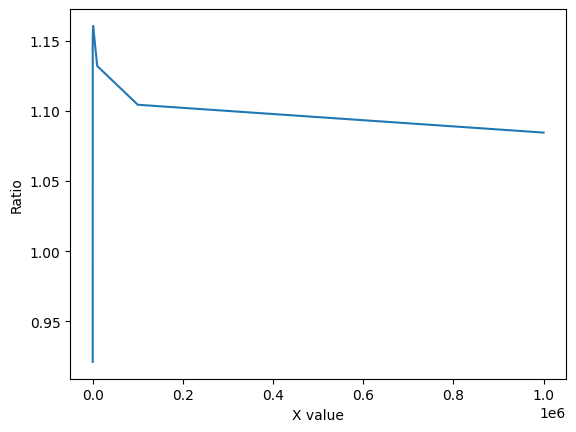

In [5]:
def count_prime(n):
    cnt = 0
    for i in range(2, n + 1):
        ok = 1
        for j in range(10):
            if i - 1 < 2:
                break
            a = random.randint(2, i - 1)
            if miller_rabin_test(a, i) == 0:
                ok = 0
                break
        if ok == 1 or i == 2:
            cnt += 1
    return cnt

print("r(20) =", count_prime(20))
print("r(30) =", count_prime(30))
print("r(100) =", str(count_prime(100)) + str(";"), "ratio(100) =", count_prime(100) / (100 / math.log(100)))
print("r(1000) =", str(count_prime(1000)) + str(";"), "ratio(1000) =", count_prime(1000) / (1000 / math.log(1000)))
print("r(10000) =", str(count_prime(10000)) + str(";"), "ratio(10000) =", count_prime(10000) / (10000 / math.log(10000)))
print("r(100000) =", str(count_prime(100000)) + str(";"), "ratio(100000) =", count_prime(100000) / (100000 / math.log(100000)))

x = []
y = []
for i in range(1, 7):
    x.append(pow(10, i))
    y.append(count_prime(pow(10, i)) / (pow(10, i) / math.log(pow(10, i))))
plt.plot(np.array(x), np.array(y))
plt.xlabel("X value")
plt.ylabel("Ratio")

#### 3.17

(a). r_1(10) = 1; r_3(10) = 2
     r_1(25) = 3; r_3(25) = 5
     r_1(100) = 11; r_3(100) = 13
(b). ratio(100) = 1.1818181818181819
     ratio(1000) = 1.0875
     ratio(10000) = 1.0164203612479474
     ratio(100000) = 1.005226845076312


Text(0, 0.5, 'Ratio')

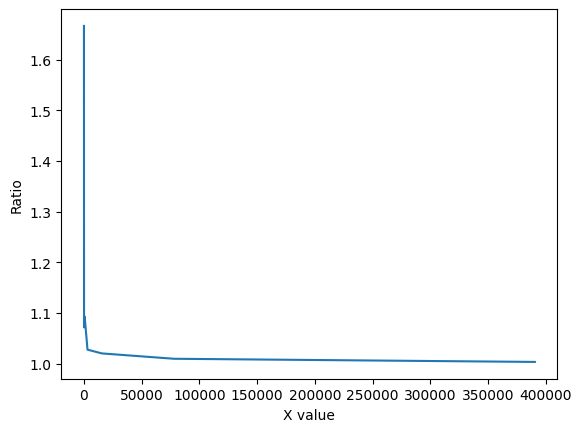

In [6]:
def count_prime_mod1(n):
    cnt = 0
    for i in range(5, n + 1, 4):
        ok = 1
        for j in range(10):
            if i - 1 < 2:
                break
            a = random.randint(2, i - 1)
            if miller_rabin_test(a, i) == 0:
                ok = 0
                break
        if ok == 1 or i == 2:
            cnt += 1
    return cnt

def count_prime_mod3(n):
    cnt = 0
    for i in range(3, n + 1, 4):
        ok = 1
        for j in range(10):
            if i - 1 < 2:
                break
            a = random.randint(2, i - 1)
            if miller_rabin_test(a, i) == 0:
                ok = 0
                break
        if ok == 1 or i == 2:
            cnt += 1
    return cnt

print("(a). r_1(10) =", str(count_prime_mod1(10)) + ";", "r_3(10) =", count_prime_mod3(10))
print("     r_1(25) =", str(count_prime_mod1(25)) + ";", "r_3(25) =", count_prime_mod3(25))
print("     r_1(100) =", str(count_prime_mod1(100)) + ";", "r_3(100) =", count_prime_mod3(100))

def calc_ratio(n):
    return count_prime_mod3(n) / count_prime_mod1(n)

print("(b). ratio(100) =", calc_ratio(100))
print("     ratio(1000) =", calc_ratio(1000))
print("     ratio(10000) =", calc_ratio(10000))
print("     ratio(100000) =", calc_ratio(100000))

x = []
y = []
for i in range(2, 9):
    x.append(pow(5, i))
    y.append(calc_ratio(pow(5, i)))
plt.plot(np.array(x), np.array(y))
plt.xlabel("X value")
plt.ylabel("Ratio")

Số lượng số nguyên tố đồng dư $3$ mod $4$ và đồng dư $1$ mod $4$ là gần như tương đương nhau khi giá trị $n$ tiến ra vô cực

#### 3.20

(a) Áp dụng tích phân từng phần ta có

$Li(X)=\displaystyle \int _{2}^{X }\mathrm \displaystyle\frac{dt}{ln(t)}\,=\displaystyle \int _{2}^{X }\mathrm \displaystyle\frac{dt}{ln(t)}\, \bigg(u=\displaystyle\frac{1}{ln(t)}\rightarrow du = \displaystyle\frac{-1}{t*ln(t)^2}, dv=dt\rightarrow v=t\bigg)=\displaystyle\frac{t}{ln(t)} \bigg|^X_2+ \displaystyle \int _{2}^{X }\mathrm \displaystyle\frac{dt}{ln(t)^2}=\displaystyle\frac{X}{ln(X)} + O(1) + \displaystyle \int _{2}^{X }\mathrm \displaystyle\frac{dt}{ln(t)^2}$

#### 3.21

In [7]:
def pollard(n):
    a = 2
    i = 2
    while True:
        a = pow(a, i, n)
        i += 1
        d = math.gcd(a - 1, n)
        if d > 1: return d, n // d

p, q = pollard(1739)
print(f"(a). n = 1739 = {p} * {q}")
p, q = pollard(220459)
print(f"(b). n = 220459 = {p} * {q}")
p, q = pollard(48356747)
print(f"(c). n = 48356747 = {p} * {q}")

(a). n = 1739 = 37 * 47
(b). n = 220459 = 449 * 491
(c). n = 48356747 = 6917 * 6991


#### 3.23

In [8]:
def factor1(n):
    count = 1
    while True:
        temp = n + count * count
        if abs(int(math.sqrt(temp)) - math.sqrt(temp)) < 1e-7: return int(math.sqrt(temp)), count
        count += 1

a, b = factor1(53357)
print("(a). n = 53357 =", a + b, "*", abs(a - b))

a, b = factor1(34571)
print("(b). n = 34571 =", a + b, "*", abs(a - b))

a, b = factor1(25777)
print("(c). n = 25777 =", a + b, "*", abs(a - b))

a, b = factor1(64213)
print("(d). n = 64213 =", a + b, "*", abs(a - b))

(a). n = 53357 = 233 * 229
(b). n = 34571 = 191 * 181
(c). n = 25777 = 173 * 149
(d). n = 64213 = 409 * 157


#### 3.25

(a) $1882^2*1898^2=30382^2=2*3^3* 5*2*3^5*5^3=(2*3^4*5^2)^2=4050^2$ $(mod$ $61063) \rightarrow a=30382$ và $b=4050$

$\rightarrow gcd(61063, 30382-4050)=gcd(61063, 26632)=1 \rightarrow$ Với dữ liệu được cung cấp thì không giải được bài toán phân tích số $61063$

(b) $763^2*773^2=7822^2=2^6*3*2^6*3^5=(2^6*3^3)^2=1728^2$ $(mod$ $52907) \rightarrow a=7822$ và $b=1728$

$\rightarrow gcd(52907, 7822-1728)=gcd(52907, 6094)=277 \rightarrow 52907 = 277 * 191$

(c) $2378^2*1605^2*2815^2=64248^2=2^5*3^3*5^3*2*7^3*3*5*7=(2^3*3^2*5^2*7^2)^2=88200^2$ $(mod$ $198103) \rightarrow a=64248$ và $b=88200$

$\rightarrow gcd(198103, 88200-64248)=gcd(198103, 23952)=499 \rightarrow 198103 = 499 * 397$

(d) $4773^2*5275^2*5401^2=214699^2=(2^4*3^5*5^2*7^2*11)^2=1872980^2$ $(mod$ $2525891) \rightarrow a=214699$ và $b=1872980$

$\rightarrow gcd(2525891, 1872980-214699)=gcd(2525891, 1658281)=1637 \rightarrow 2525891 = 1637 * 1543$

#### 3.33

(a) Với $n=493$, ta tạo 1 danh sách từ $F(23)$ đến $F(38)$. $[36, 83, 132, 183, 236, 291, 348, 407, 468, 531, 596, 663, 732, 803, 876, 951]$ và $B=11$

$p=2\rightarrow [18, 83, 66, 183, 118, 291, 174, 407, 234, 531, 298, 663, 366, 803, 438, 951]$

$p=3\rightarrow [6, 83, 22, 61, 118, 97, 58, 407, 78, 177, 298, 221, 122, 803, 146, 317]$

$p=4=2^2\rightarrow [3, 83, 11, 61, 59, 97, 29, 407, 39, 177, 149, 221, 61, 803, 73, 317]$

$p=5\rightarrow [3, 83, 11, 61, 59, 97, 29, 407, 39, 177, 149, 221, 61, 803, 73, 317]$

$p=7\rightarrow [3, 83, 11, 61, 59, 97, 29, 407, 39, 177, 149, 221, 61, 803, 73, 317]$

$p=9\rightarrow [1, 83, 11, 61, 59, 97, 29, 407, 13, 59, 149, 221, 61, 803, 73, 317]$

$p=11\rightarrow [1, 83, 1, 61, 59, 97, 29, 37, 13, 59, 149, 221, 61, 73, 73, 317]$

Vậy $F(23)=36$ và $F(25)=132$ được sàng về $1$ với $B=11$

$23^2=2^2*3^2$ $(mod$ $493)$ và $25^2=2^2*3*11$ $(mod$ $493)$

Có: $23^2=6^2$ $(mod$ $493)$ và $gcd(23-6, 493)=17$ $\rightarrow 493=17*29$

(b) Danh sách từ $F(23)$ đến $F(50)$ là $[36, 83, 132, 183, 236, 291, 348, 407, 468, 531, 596, 663, 732, 803, 876, 951, 1028, 1107, 1188, 1271, 1356, 1443, 1532, 1623, 1716, 1811, 1908, 2007]$

$p=2\rightarrow [18, 83, 66, 183, 118, 291, 174, 407, 234, 531, 298, 663, 366, 803, 438, 951, 514, 1107, 594, 1271, 678, 1443, 766, 1623, 858, 1811, 954, 2007]$

$p=3\rightarrow [6, 83, 22, 61, 118, 97, 58, 407, 78, 177, 298, 221, 122, 803, 146, 317, 514, 369, 198, 1271, 226, 481, 766, 541, 286, 1811, 318, 669]$

$p=4=2^2\rightarrow [3, 83, 11, 61, 59, 97, 29, 407, 39, 177, 149, 221, 61, 803, 73, 317, 257, 369, 99, 1271, 113, 481, 383, 541, 143, 1811, 159, 669]$

$p=5\rightarrow [3, 83, 11, 61, 59, 97, 29, 407, 39, 177, 149, 221, 61, 803, 73, 317, 257, 369, 99, 1271, 113, 481, 383, 541, 143, 1811, 159, 669]$

$p=7\rightarrow [3, 83, 11, 61, 59, 97, 29, 407, 39, 177, 149, 221, 61, 803, 73, 317, 257, 369, 99, 1271, 113, 481, 383, 541, 143, 1811, 159, 669]$

$p=8=2^3\rightarrow [3, 83, 11, 61, 59, 97, 29, 407, 39, 177, 149, 221, 61, 803, 73, 317, 257, 369, 99, 1271, 113, 481, 383, 541, 143, 1811, 159, 669]$

$p=9\rightarrow [1, 83, 11, 61, 59, 97, 29, 407, 13, 59, 149, 221, 61, 803, 73, 317, 257, 123, 33, 1271, 113, 481, 383, 541, 143, 1811, 53, 223]$

$p=11\rightarrow [1, 83, 1, 61, 59, 97, 29, 37, 13, 59, 149, 221, 61, 73, 73, 317, 257, 123, 3, 1271, 113, 481, 383, 541, 13, 1811, 53, 223]$

$p=13\rightarrow [1, 83, 1, 61, 59, 97, 29, 37, 1, 59, 149, 17, 61, 73, 73, 317, 257, 123, 3, 1271, 113, 37, 383, 541, 1, 1811, 53, 223]$

$p=16=2^4\rightarrow [1, 83, 1, 61, 59, 97, 29, 37, 1, 59, 149, 17, 61, 73, 73, 317, 257, 123, 3, 1271, 113, 37, 383, 541, 1, 1811, 53, 223]$

Vậy ngoài $F(23)$ và $F(25)$ thì ta còn có $F(31)$ và $F(47)$

$31^2=2^2*3^2*13$ $(mod$ $493)$ và $47^2=2^2*3*11*13$ $(mod$ $493)$

#### 3.34

(a) $u=-5-2\beta + 9\beta ^2 -9\beta ^3$ và $v=2+9\beta -7\beta ^2 +7\beta ^3$

$\rightarrow u+v=-3+7\beta +2\beta ^2-2\beta^3$

Nhân 2 phần tử $u$ và $v$ ta ra được $-10-49\beta+35\beta ^2 +42\beta ^3-158\beta ^4+126\beta ^5 - 63\beta ^6$

Lấy phần dư của kết quả trên cho đa thức $f(x)=1+3x-2x^3+x^4$ ta được $uv=-85\beta^3+98\beta^2+425\beta+148$

(b) $u=9+9\beta + 6\beta ^2 -5\beta ^3$ và $v=-4-6\beta -2\beta ^2 -5\beta ^3$

$\rightarrow u+v=5+3\beta +4\beta ^2-10\beta^3$

Nhân 2 phần tử $u$ và $v$ ta ra được $-36-90\beta-96\beta ^2-79\beta ^3-27\beta ^4-20\beta ^5+25\beta ^6$

Lấy phần dư của kết quả trên cho đa thức $f(x)=1+3x-2x^3+x^4$ ta được $uv=-88\beta^3-211\beta^2-219\beta-69$

(c) $u=6-5\beta + 3\beta ^2 +3\beta ^3$ và $v=-2+7\beta +6\beta ^2$

$\rightarrow u+v=4+2\beta +9\beta ^2+3\beta^3$

Nhân 2 phần tử $u$ và $v$ ta ra được $-12+52\beta-5\beta ^2 -15\beta ^3+39\beta ^4+18\beta ^5$

Lấy phần dư của kết quả trên cho đa thức $f(x)=1+3x-2x^3+x^4$ ta được $uv=135\beta^3-59\beta^2-191\beta-87$

#### 3.35

(a) $p=19079$ và $g=17$

$i=3030\rightarrow 17^{3030}\equiv 14580\equiv 2^2*3^6*5$ $(mod$ $19079)$ là 5-smooth

$i=6892\rightarrow 17^{6892}\equiv 18432\equiv 2^{11}*3^2$ $(mod$ $19079)$ là 5-smooth (hay 3-smooth)

$i=18312\rightarrow 17^{18312}\equiv 6000\equiv 2^4*3*5^3$ $(mod$ $19079)$ là 5-smooth

(b) Lấy $log_{17}$ trong $\mathbb{F}_{19079}$ cho 2 vế ta có

$3030 = 2*log_{17}(2) + 6*log_{17}(3) + log_{17}(5)$ $(mod$ $19078)$

$6892 = 11*log_{17}(2) + 2*log_{17}(3)$ $(mod$ $19078)$

$18312 = 4*log_{17}(2) + log_{17}(3) + 3*log_{17}(5)$ $(mod$ $19078)$

Giải hệ phương trình trên bằng phương pháp Gauss ta được $log_{17}(2)=17734;log_{17}(3)=10838;log_{17}(5)=17002$

(c) $19*17^{-12400}\equiv 384\equiv 2^7*3$ $(mod$ $19079)$ là 5-smooth

(d) $17^x\equiv 19$ $(mod$ $19079) \Leftrightarrow 17^{x-12400}\equiv 19*17^{-12400}\equiv 2^7*3$ $(mod$ $19079)$

Lấy $log_{17}$ trong $\mathbb{F}_{19079}$ cho 2 vế ta có $x-12400 \equiv 7*log_{17}(2) + log_{17}(3)\equiv 1430$ $(mod$ $19078)$ $\rightarrow x = 13830$

#### 3.36

(a) Theo định lý Fermat nhỏ ta có $a^{p-1}\equiv 1$ $(mod$ $p)$ $\rightarrow a^{(p-1)/2}\equiv \pm 1$ $(mod$ $p)$

(b) $a \in \mathbb{QR}_p$ $\rightarrow a\equiv b^2$ $(mod$ $p) \rightarrow a^{(p-1)/2}\equiv b^{p-1}\equiv 1$ $(mod$ $p)$

$a^{(p-1)/2}\equiv 1\equiv 1^2$ $(mod$ $p) \rightarrow a \in \mathbb{QR}_p$

(c) Nếu $a \in \mathbb{QR}_p$ $\rightarrow(\frac{a}{p})=1$, thì $a^{(p-1)/2}\equiv 1$ $(mod$ $p)$ (như chứng minh ở trên)

Nếu $a \notin \mathbb{QR}_p$ $\rightarrow(\frac{a}{p})=-1$, thì $a^{(p-1)/2}\equiv -1$ $(mod$ $p)$ (trường hợp còn lại như câu (a))

Nếu $p$ | $a$ $\rightarrow(\frac{a}{p})=-1$, thì $a^{(p-1)/2}\equiv 0$ $(mod$ $p)$ ($a$ chia hết cho $p$)

Vậy $a^{(p-1)/2}\equiv (\frac{a}{p})$ $(mod$ $p)$

(d) Với $p\equiv 1$ $(mod$ $4)$ thì $p-1=4k$ với $k \in \mathbb{Z} \rightarrow (\frac{-1}{p})\equiv(-1)^{(p-1)/2}\equiv(-1)^{2k}\equiv 1$ $(mod$ $p)$

Với $p\equiv 3$ $(mod$ $4)$ thì $p-1=4k+2$ với $k \in \mathbb{Z} \rightarrow (\frac{-1}{p})\equiv(-1)^{(p-1)/2}\equiv(-1)^{2k+1}\equiv -1$ $(mod$ $p)$

#### 3.38

(a) $p\equiv 3$ $(mod$ $4) \rightarrow p+1 = 4k$ với $k \in \mathbb{Z}$

Với $a\equiv b^2$ $(mod$ $p)$ ta có $a^{(p+1)/4}\equiv b^{(p+1)/2}\equiv b*b^{(p-1)/2}\equiv \pm b$ $(mod$ $p)$

Vậy $b \equiv \pm a^{(p+1)/4}$ $(mod$ $p)$

In [9]:
def solve_quadratic_residue(a, p):
    if p % 4 != 3: return -1
    result = pow(a, (p + 1) // 4, p)
    if pow(result, 2, p) == a: return result
    return -1

res = solve_quadratic_residue(116, 587)
if res == -1: print("(i). No solution")
else: print("(i). b =", res)

res = solve_quadratic_residue(3217, 8627)
if res == -1: print("(ii). No solution")
else: print("(ii). b =", res)

res = solve_quadratic_residue(9109, 10663)
if res == -1: print("(iii). No solution")
else: print("(iii). b =", res)

(i). b = 65
(ii). b = 2980
(iii). No solution
